In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.ticker as tck
from pathlib import Path
import functions as f

In [11]:
t = 20
to_Myr   = 9.78462 # converts from snapshot time units to Myr
Omegap   = 0.4 	   # pattern speed of the bar

In [12]:
X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/strongbar/data_{t}.npy')

In [13]:
FIG_DIR = Path('./../figures/')

In [14]:
PHI = np.arctan2(Y, X)
VR = VX * np.cos(PHI) + VY * np.sin(PHI)
VPHI = - VX * np.sin(PHI) + VY * np.cos(PHI)

In [10]:
X, Y, VX, VY = f.rotate_bar(np.deg2rad(15), X, Y, VX, VY)

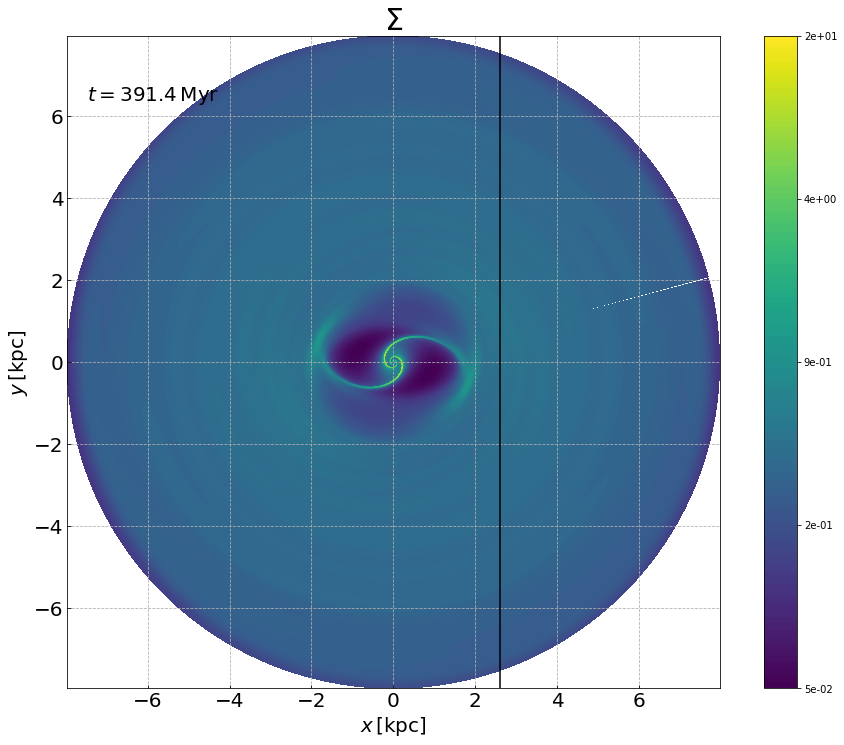

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
levels = np.logspace(np.log10(RHO).min(), np.log10(RHO).max(), 101)
cbarticks = np.logspace(np.log10(RHO).min(), np.log10(RHO).max(), 5)
norm = mc.BoundaryNorm(levels, 256)
im1 = ax.contourf(X, Y, RHO, norm=norm, levels=levels, cmap='viridis')
ax.axvline(2.6, c='black')
ax.annotate(r'$t=%.1f\, \rm Myr$' % (t * to_Myr), xy=(0.03, 0.9), xycoords='axes fraction', fontsize=20, color='k')
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
ax.set_ylabel(r'$y\, \rm [kpc]$', fontsize=20)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_aspect('1')
ax.set_title(r'$\Sigma$', fontsize=30)

plt.colorbar(im1, ticks=cbarticks, format='%.0e')
plt.savefig(FIG_DIR / 'surface_density.png', bbox_inches='tight', transparent=True)

### animated plot

In [132]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML

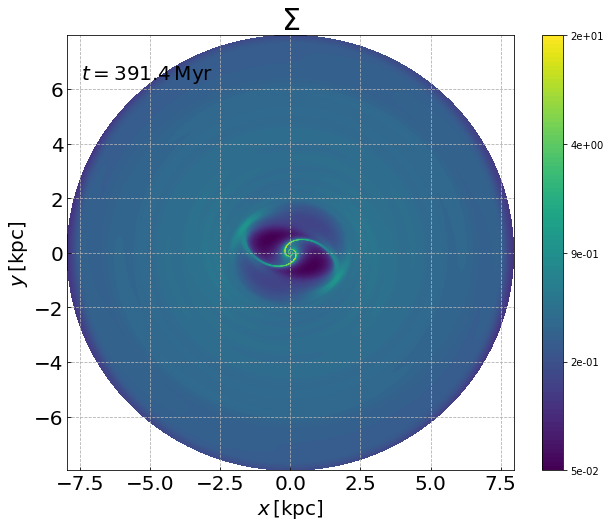

In [135]:
fig, ax = plt.subplots(figsize=(10, 8))

l1 = ax.contourf(X, Y, RHO, norm=norm, levels=levels, cmap='viridis')

ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
ax.set_ylabel(r'$y\, \rm [kpc]$', fontsize=20)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_title(r'$\Sigma$', fontsize=30)
plt.colorbar(l1, ticks=cbarticks, format='%.0e')

ANN = []
def animate(i):
    if len(ANN) > 0: 
        for a in ANN:
            a.remove()
    ANN[:] = []
    X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/weakbar/data_{i}.npy')
    ax.contourf(X, Y, RHO, norm=norm, levels=levels, cmap='viridis')
    annotation = plt.annotate(r'$t=%.1f\, \rm Myr$' % (i * to_Myr),
                              xy=(0.03, 0.9), xycoords='axes fraction', fontsize=20, color='k')
    ANN.append(annotation)
    return l1

ani = FuncAnimation(fig, animate, frames=np.arange(0, 41, 1).astype(int), interval=160)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save(FIG_DIR / 'surface_density_weak.mp4', writer=writer, dpi=300)

HTML(ani.to_jshtml())

### plot velocities 

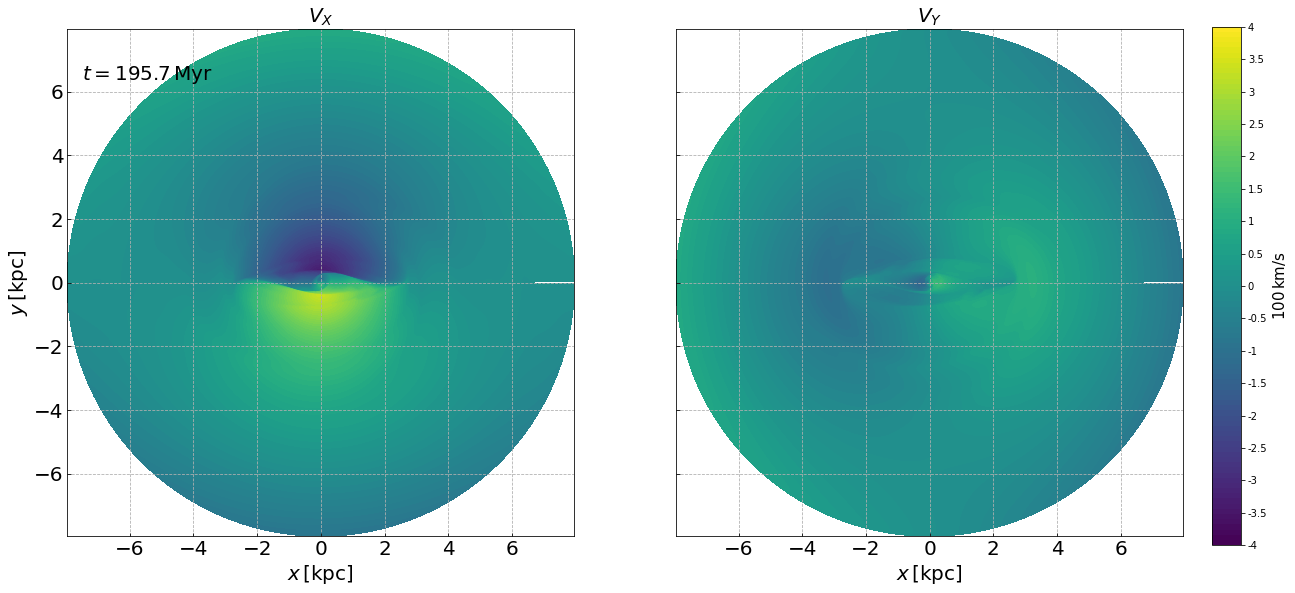

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,18), sharex=True, sharey=True)
levels = np.linspace(-4, 4, 101)
cbarticks = np.linspace(-4, 4, 17)
norm = mc.BoundaryNorm(levels, 256)
im1 = ax[0].contourf(X, Y, VX, norm=norm, levels=levels, cmap='viridis')
im1 = ax[1].contourf(X, Y, VY, norm=norm, levels=levels, cmap='viridis')
ax[0].annotate(r'$t=%.1f\, \rm Myr$' % (t * to_Myr),
               xy=(0.03, 0.9), xycoords='axes fraction', fontsize=20, color='k')
for i in range(2):
    ax[i].grid(ls='dashed')
    ax[i].tick_params(labelsize=20, direction='in')
    ax[i].set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
    ax[i].set_xlim(X.min(), X.max())
    ax[i].set_ylim(Y.min(), Y.max())
    ax[i].set_aspect('1')
ax[0].set_ylabel(r'$y\, \rm [kpc]$', fontsize=20)
ax[0].set_title(r'$V_X$', fontsize=20)
ax[1].set_title(r'$V_Y$', fontsize=20)
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cb = plt.colorbar(im1, cax=cbar_ax, ticks=cbarticks, format='%g')
cb.set_label(label=r'$\rm 100\, km/s$', size=15)



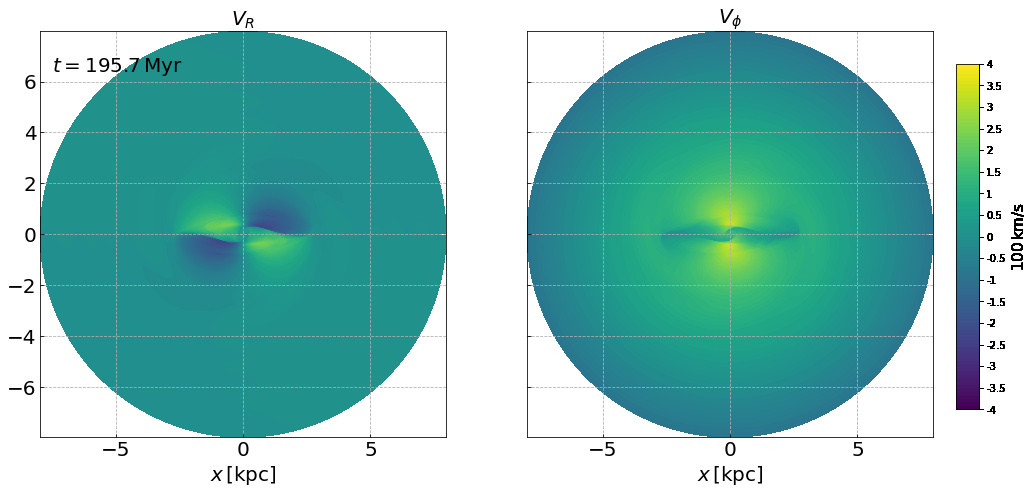

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
levels = np.linspace(-4, 4, 101)
cbarticks = np.linspace(-4, 4, 17)
norm = mc.BoundaryNorm(levels, 256)

l1 = ax[0].contourf(X, Y, VR, norm=norm, levels=levels, cmap='viridis')
l1 = ax[1].contourf(X, Y, VPHI, norm=norm, levels=levels, cmap='viridis')

for i in range(2):
    ax[i].grid(ls='dashed')
    ax[i].tick_params(labelsize=20, direction='in')
    ax[i].set_xlabel(r'$x\, \rm [kpc]$', fontsize=20)
    ax[i].set_xlim(X.min(), X.max())
    ax[i].set_ylim(Y.min(), Y.max())
    ax[i].set_aspect('1')
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cb = plt.colorbar(l1, cax=cbar_ax, ticks=cbarticks, format='%g')
cb.set_label(label=r'$\rm 100\, km/s$', size=15)
ax[0].set_title(r'$V_R$', fontsize=20)
ax[1].set_title(r'$V_\phi$', fontsize=20)

ANN = []
def animate(i):
    if len(ANN) > 0: 
        for a in ANN:
            a.remove()
    ANN[:] = []
    X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/data_{i}.npy')
    PHI = np.arctan2(Y, X)
    VR = VX * np.cos(PHI) + VY * np.sin(PHI)
    VPHI = - VX * np.sin(PHI) + VY * np.cos(PHI)
    l1 = ax[0].contourf(X, Y, VR, norm=norm, levels=levels, cmap='viridis')
    l1 = ax[1].contourf(X, Y, VPHI, norm=norm, levels=levels, cmap='viridis')
    for j in range(2):
        ax[j].grid(ls='dashed')
        ax[j].tick_params(labelsize=20, direction='in')
        ax[j].set_xlabel(r'$x\, \rm [kpc]$',fontsize=20)
        ax[j].set_xlim(X.min(), X.max())
        ax[j].set_ylim(Y.min(), Y.max())
        ax[j].set_aspect('1')
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = plt.colorbar(l1, cax=cbar_ax, ticks=cbarticks, format='%g')
    cb.set_label(label=r'$\rm 100\, km/s$', size=15)
    ax[0].set_title(r'$V_R$', fontsize=20)
    ax[1].set_title(r'$V_\phi$', fontsize=20)
    
    annotation = ax[0].annotate(r'$t=%.1f\, \rm Myr$' % (i * to_Myr),
                                xy=(0.03, 0.9), xycoords='axes fraction', fontsize=20, color='k')
    ANN.append(annotation)

    return l1

ani = FuncAnimation(fig, animate, frames=np.arange(0, 21, 1).astype(int), interval=150)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=5000)
ani.save(FIG_DIR / 'galaxy_plane_velocities_.mp4', writer=writer, dpi=300)

HTML(ani.to_jshtml())